In [25]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('fivethirtyeight') #样式美化
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report#这个包是评价报告

In [26]:
data=pd.read_csv('ex2data1.txt',names=['exam1','exam2','admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [27]:
data.describe()#数据详细内容

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


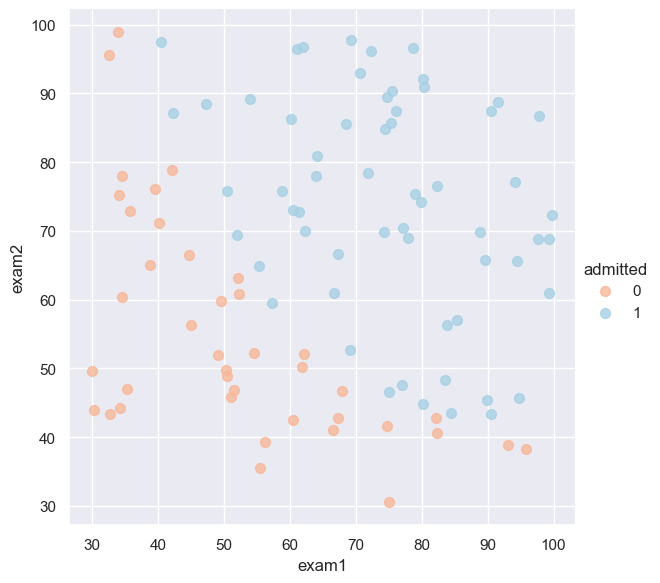

In [28]:
sns.set_theme(context="notebook",style="darkgrid",palette=sns.color_palette("RdBu",2))
sns.lmplot(x='exam1',y='exam2',hue='admitted',data=data,height=6,
    aspect=1,fit_reg=False,scatter_kws={"s":50})
plt.show()

In [29]:
def get_X(df):#读取特征
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    ones = pd.DataFrame({'ones': np.ones(len(df))})#ones是m行1列的dataframe
    data = pd.concat([ones, df], axis=1)  # 合并数据，根据列合并 axis = 1的时候，concat就是行对齐，然后将不同列名称的两张表合并 加列
    return data.iloc[:, :-1].values  # 这个操作返回 ndarray,不是矩阵

def get_y(df):#读取标签
#     '''assume the last column is the target'''
    return np.array(df.iloc[:, -1])     #df.iloc[:, -1]是指df的最后一列

def normalize_feature(df):      #特征缩放
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())#特征缩放在逻辑回归同样适用

In [30]:
X = get_X(data)
print(X.shape)

y = get_y(data)
print(y.shape)

(100, 3)
(100,)


In [31]:
def sigmoid(z):  #定义sigmoid函数
    
    return 1 / (1 + np.exp(-z))

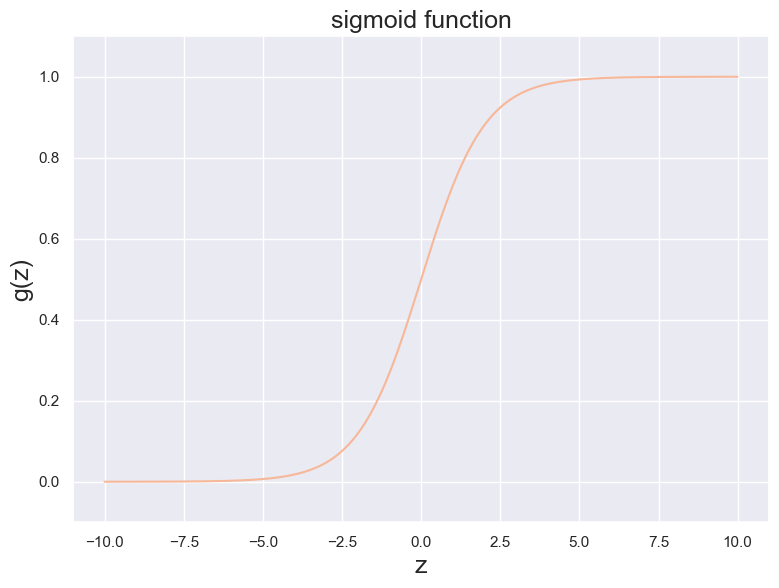

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(-10, 10, step=0.01),
        sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))     #lim 轴线显示长度
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

In [33]:
theta=np.zeros(3) # X(m*n) so theta is n*1
print(theta.shape)
theta

(3,)


array([0., 0., 0.])

In [34]:
def cost(theta, X, y):
    ''' cost fn is -l(theta) for you to minimize'''
    
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))
# X @ theta与X.dot(theta)等价

In [35]:
cost(theta, X, y)

0.6931471805599453

# 梯度下降

In [36]:
def gradient(theta, X, y):
    
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [37]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

# 拟合参数

In [38]:
import scipy.optimize as opt

In [39]:
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)  #优化算法

In [40]:
print(res)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.20349771125713917
       x: [-2.515e+01  2.062e-01  2.014e-01]
     nit: 28
     jac: [-2.222e-06 -3.522e-04 -2.229e-04]
    nfev: 71
    njev: 189
    nhev: 0


In [41]:
def predict(x, theta):
    
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)   #实现变量类型转换

In [42]:
final_theta = res.x  #最优theta
y_pred = predict(X, final_theta)  #N维 ---0，1

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



# 寻找决策边界

In [43]:
print(res.x) # this is final theta

[-25.15327169   0.20616723   0.20140637]


In [44]:
coef = -(res.x / res.x[2])  # find the equation
print(coef)

x = np.arange(130, step=0.1)
y = coef[0] + coef[1]*x

[124.88816478  -1.02363807  -1.        ]


In [45]:
data.describe()  # find the range of x and y

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


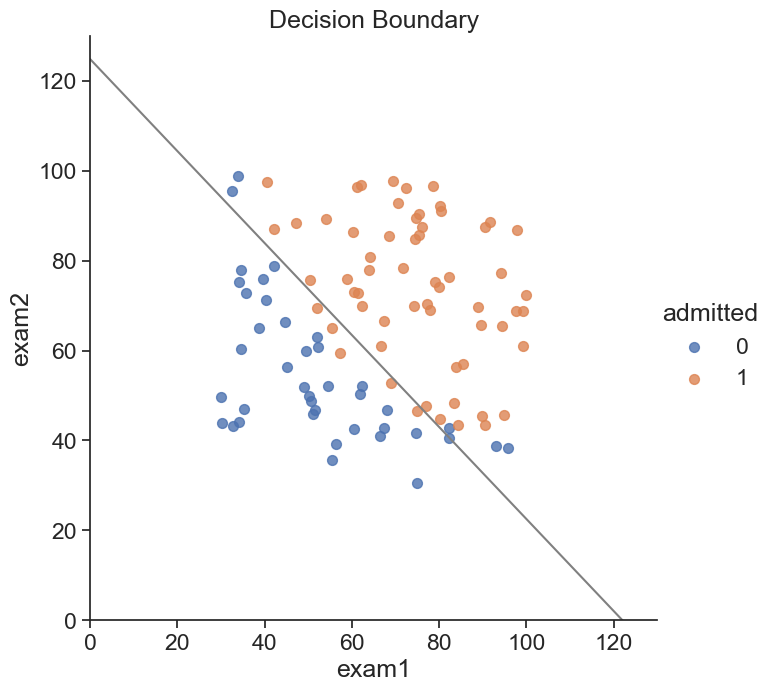

In [47]:
sns.set_theme(context="notebook", style="ticks", font_scale=1.5) 
sns.lmplot(x='exam1',y='exam2', hue='admitted', data=data, height=7,aspect=1,fit_reg=False,scatter_kws={"s":50})

plt.plot(x, y, 'grey')
plt.xlim(0, 130) 
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()

# 正则化逻辑回归

In [52]:
df=pd.read_csv('ex2data2.txt',names=['test1','test2','accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


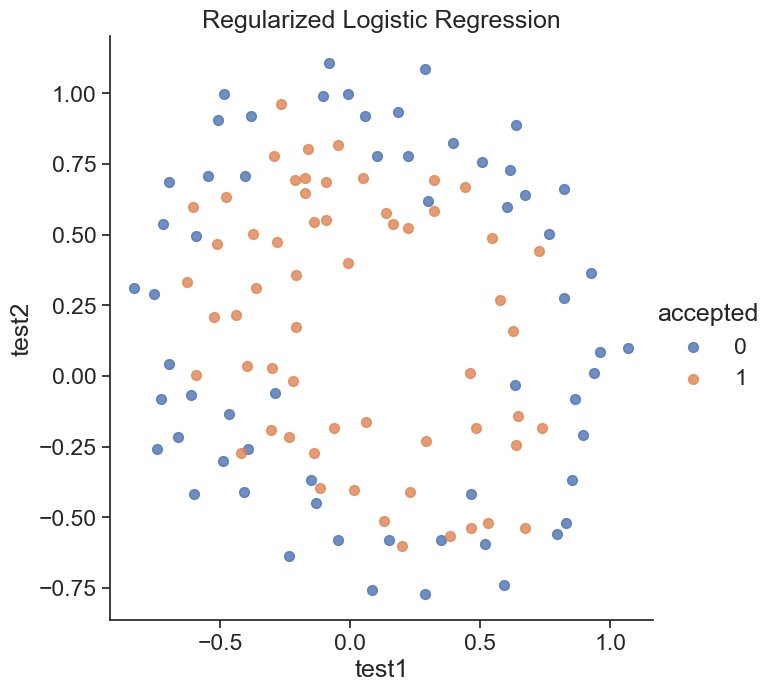

In [53]:
sns.set_theme(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot(x='test1', y='test2', hue='accepted', data=df, 
           height=7,aspect=1,
           fit_reg=False, 
           scatter_kws={"s": 50}
          )
plt.title('Regularized Logistic Regression')
plt.show()

# feature mapping 特征映射

In [61]:
def feature_mapping(x, y, power, as_ndarray=False):
#     """return mapped features as ndarray or dataframe"""

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).to_numpy()
    else:
        return pd.DataFrame(data)


In [55]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

In [56]:
data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


# regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [62]:
theta = np.zeros(data.shape[1])
print(theta.shape)
X = feature_mapping(x1, x2, power=6, as_ndarray=True)
print(X.shape)

y = get_y(df)
print(y.shape)

(28,)
(118, 28)
(118,)


In [63]:
def regularized_cost(theta, X, y, l=1):  
    # your code here  (appro ~ 3 lines
    theta_j1_to_n = theta[1:]
    regularized_term = (l / (2 * len(X))) * np.power(theta_j1_to_n, 2).sum()
    
    return  cost(theta, X, y) + regularized_term

In [64]:
regularized_cost(theta, X, y, l=1)

0.6931471805599454

# regularized gradient(正则化梯度)
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} \right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [65]:
def regularized_gradient(theta, X, y, l=1):
    # your code here  (appro ~ 3 lines)
    theta_j1_to_n = theta[1:]
    regularized_theta = (l / len(X)) * theta_j1_to_n
    
    regularized_term = np.concatenate([np.array([0]), regularized_theta])
    return gradient(theta, X, y) + regularized_term

In [66]:
regularized_gradient(theta, X, y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

# 拟合参数

In [67]:
import scipy.optimize as opt # type: ignore

In [68]:
print('init cost = {}'.format(regularized_cost(theta, X, y)))

res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, y), method='Newton-CG', jac=regularized_gradient)
res

init cost = 0.6931471805599454


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.529002729712815
       x: [ 1.273e+00  6.253e-01 ... -1.439e-01 -9.247e-01]
     nit: 6
     jac: [ 1.338e-07  5.416e-08 ... -7.665e-11  2.216e-08]
    nfev: 7
    njev: 57
    nhev: 0

In [69]:
final_theta = res.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



# 画出决策边界

In [81]:
def draw_boundary(power, l):
#     """
#     power: polynomial power for mapped feature  is 6
#     l: lambda constant
#     """
    density = 1000
    threshhold = 2 * 10**-3   #阈值

    final_theta = feature_mapped_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)

    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot(x='test1', y='test2', hue='accepted', data=df,height=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='red', s=10)
    plt.title('Decision boundary')
    plt.show()

In [76]:
def feature_mapped_logistic_regression(power, l):
#     """for drawing purpose only.. not a well generealize logistic regression
#     power: int
#         raise x1, x2 to polynomial power
#     l: int
#         lambda constant for regularization term
#     """
    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_y(df)

    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])

    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient)
    final_theta = res.x

    return final_theta

In [79]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe   2->28

    inner_product = mapped_cord.to_numpy() @ theta   # 1000^2 *28    28*1

    decision = mapped_cord[np.abs(inner_product) < threshhold]  #  Find valid submatrices

    return decision.f10, decision.f01
#寻找决策边界函数

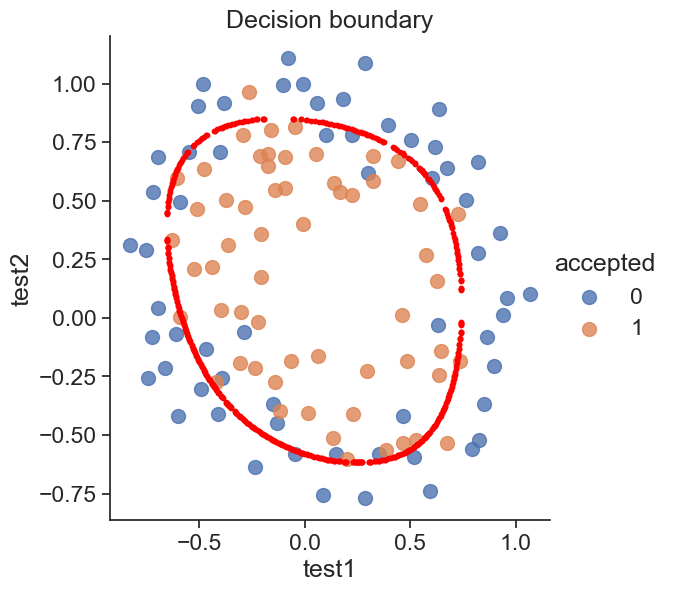

In [82]:
draw_boundary(power=6, l=1)     #set lambda = 1

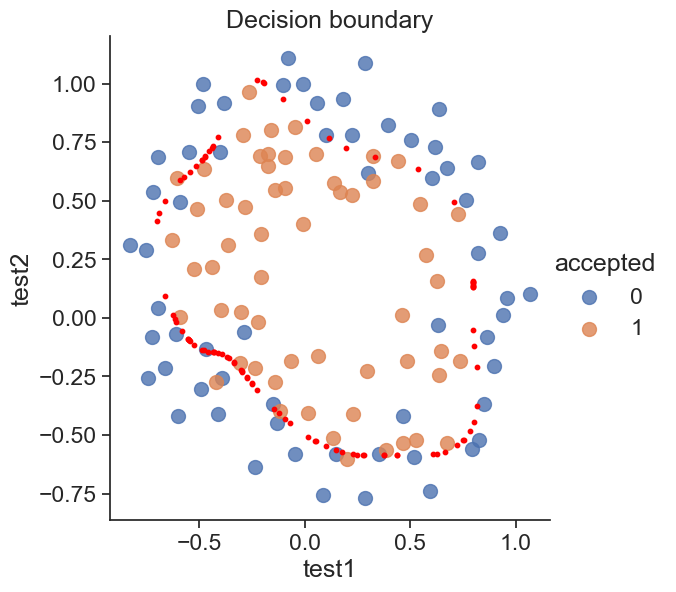

In [83]:
draw_boundary(power=6,l=0)  # set lambda < 0.1  overfitting